In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nayee\AppData\Local\Temp\ipykernel_19912\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('crime1.csv')
df

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,2001,13,0,0,3,0,3,2,2,...,4,118,0,19,1,9,0,0,323,658
1,A & N ISLANDS,2002,17,3,1,2,0,2,2,1,...,2,97,0,17,3,4,0,0,328,608
2,A & N ISLANDS,2003,21,4,1,2,0,2,2,2,...,8,110,0,9,2,7,0,0,318,644
3,A & N ISLANDS,2004,15,1,2,10,0,10,3,3,...,9,105,0,6,3,5,0,6,387,748
4,A & N ISLANDS,2005,14,3,3,4,0,4,2,1,...,6,79,0,11,1,5,0,3,362,682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,WEST BENGAL,2008,1811,1732,488,2263,0,2263,2332,1907,...,150,9033,451,2396,94,13663,5,3789,38177,105419
416,WEST BENGAL,2009,2068,2119,931,2336,0,2336,2750,2187,...,344,11196,506,1942,108,16112,5,3623,38776,113036
417,WEST BENGAL,2010,2398,2111,630,2311,0,2311,3345,2764,...,331,12764,507,2465,163,17796,8,2847,49096,129616
418,WEST BENGAL,2011,2109,2242,486,2363,0,2363,4285,3711,...,413,13094,510,2363,200,19772,0,3249,56614,143197


In [3]:
df.isnull().sum()

STATE/UT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                                             0
OTHER THEFT                    

In [4]:
df['YEAR'] = df['YEAR'].astype(int)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 32 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             420 non-null    object
 1   YEAR                                                 420 non-null    int32 
 2   MURDER                                               420 non-null    int64 
 3   ATTEMPT TO MURDER                                    420 non-null    int64 
 4   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            420 non-null    int64 
 5   RAPE                                                 420 non-null    int64 
 6   CUSTODIAL RAPE                                       420 non-null    int64 
 7   OTHER RAPE                                           420 non-null    int64 
 8   KIDNAPPING & ABDUCTION                               420 non-null    int64 
 9  

In [6]:
top_burglary_states = df.groupby("STATE/UT")["BURGLARY"].sum().reset_index().sort_values(by='BURGLARY',ascending=False).head(10)
top_burglary_states

,STATE/UT,BURGLARY
20,MAHARASHTRA,185617
19,MADHYA PRADESH,137346
1,ANDHRA PRADESH,97336
16,KARNATAKA,73298
32,UTTAR PRADESH,65587
28,RAJASTHAN,65268
11,GUJARAT,60689
30,TAMIL NADU,53339
12,HARYANA,46504
17,KERALA,46371


C:\Users\nayee\AppData\Local\Temp\ipykernel_19912\4046289278.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_burglary_states, x="STATE/UT", y="BURGLARY", palette="Reds_r")


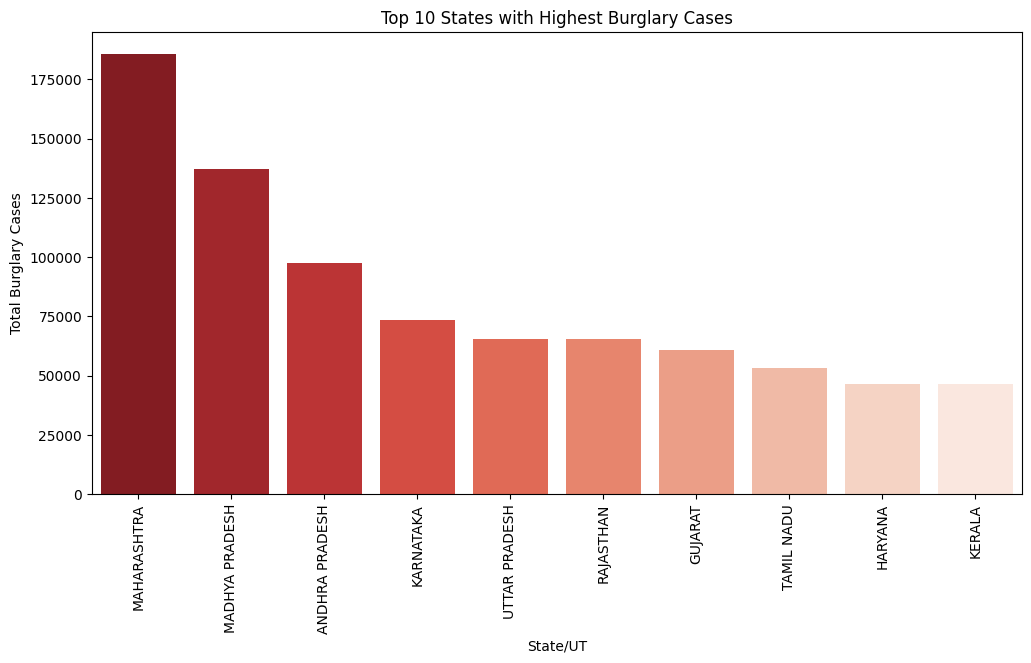

In [7]:
top_burglary_states = df.groupby("STATE/UT")["BURGLARY"].sum().reset_index()
top_burglary_states = top_burglary_states.sort_values(by="BURGLARY", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_burglary_states, x="STATE/UT", y="BURGLARY", palette="Reds_r")
plt.xticks(rotation=90)
plt.xlabel("State/UT")
plt.ylabel("Total Burglary Cases")
plt.title("Top 10 States with Highest Burglary Cases")
plt.show()


In [8]:
top_riots_states = df.groupby("STATE/UT")["RIOTS"].sum().reset_index().sort_values(by='RIOTS',ascending=False).head(10)
top_riots_states

,STATE/UT,RIOTS
4,BIHAR,105096
17,KERALA,96274
20,MAHARASHTRA,90244
16,KARNATAKA,78421
32,UTTAR PRADESH,54110
34,WEST BENGAL,51154
30,TAMIL NADU,37368
28,RAJASTHAN,36073
3,ASSAM,34963
19,MADHYA PRADESH,31124


C:\Users\nayee\AppData\Local\Temp\ipykernel_19912\3049191108.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_riots_states, x="STATE/UT", y="RIOTS", palette="Reds_r")


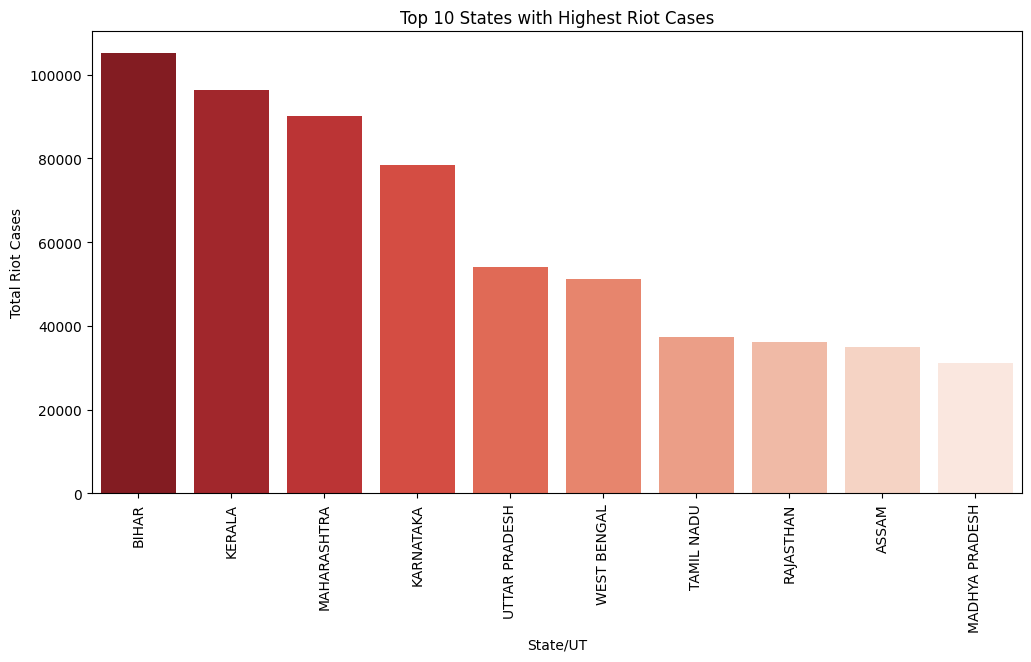

In [9]:
top_riots_states = df.groupby("STATE/UT")["RIOTS"].sum().reset_index()
top_riots_states = top_riots_states.sort_values(by="RIOTS", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_riots_states, x="STATE/UT", y="RIOTS", palette="Reds_r")
plt.xticks(rotation=90)
plt.xlabel("State/UT")
plt.ylabel("Total Riot Cases")
plt.title("Top 10 States with Highest Riot Cases")
plt.show()


In [10]:
print(df.columns)


Index(['STATE/UT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')


In [11]:
top_crime_states=df.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index().sort_values(by='TOTAL IPC CRIMES',ascending=False).head(10)
top_crime_states

,STATE/UT,TOTAL IPC CRIMES
19,MADHYA PRADESH,2413770
20,MAHARASHTRA,2273436
30,TAMIL NADU,2060176
1,ANDHRA PRADESH,2018981
32,UTTAR PRADESH,1858074
28,RAJASTHAN,1855916
16,KARNATAKA,1481063
17,KERALA,1437459
11,GUJARAT,1385775
4,BIHAR,1346293


C:\Users\nayee\AppData\Local\Temp\ipykernel_19912\1656524743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_crime_states, x="STATE/UT", y="TOTAL IPC CRIMES", palette="Reds_r")


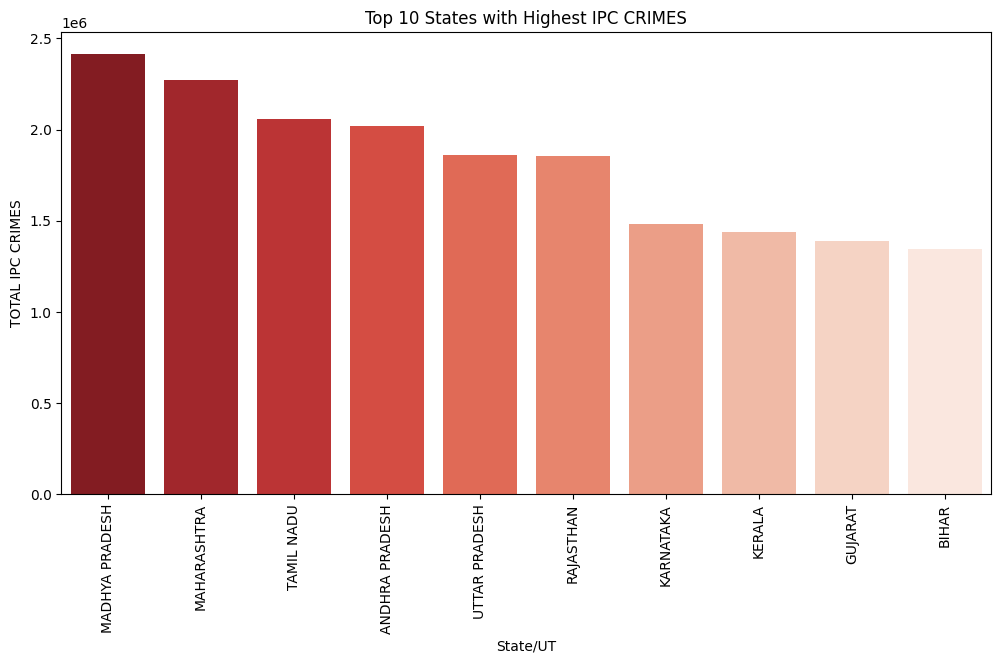

In [12]:
top_crime_states = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum().reset_index()
top_crime_states = top_crime_states.sort_values(by="TOTAL IPC CRIMES", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_crime_states, x="STATE/UT", y="TOTAL IPC CRIMES", palette="Reds_r")
plt.xticks(rotation=90)
plt.xlabel("State/UT")
plt.ylabel("TOTAL IPC CRIMES")
plt.title("Top 10 States with Highest IPC CRIMES")
plt.show()

In [13]:
print(df.columns)

Index(['STATE/UT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')


In [14]:
top_crime_year = df.groupby("YEAR")["TOTAL IPC CRIMES"].sum().reset_index().reset_index().sort_values(by='TOTAL IPC CRIMES',ascending=False).head(10)
top_crime_year = top_crime_year.sort_values(by="TOTAL IPC CRIMES", ascending=False)

# Display the year with the highest crime
top_crime_year

,index,YEAR,TOTAL IPC CRIMES
11,11,2012,2387188
10,10,2011,2325575
9,9,2010,2224831
8,8,2009,2121345
7,7,2008,2093379
6,6,2007,1989673
5,5,2006,1878293
3,3,2004,1832010
4,4,2005,1822602
1,1,2002,1780330


C:\Users\nayee\AppData\Local\Temp\ipykernel_19912\3792775565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_crime_year, x="YEAR", y="TOTAL IPC CRIMES", palette="Reds_r")


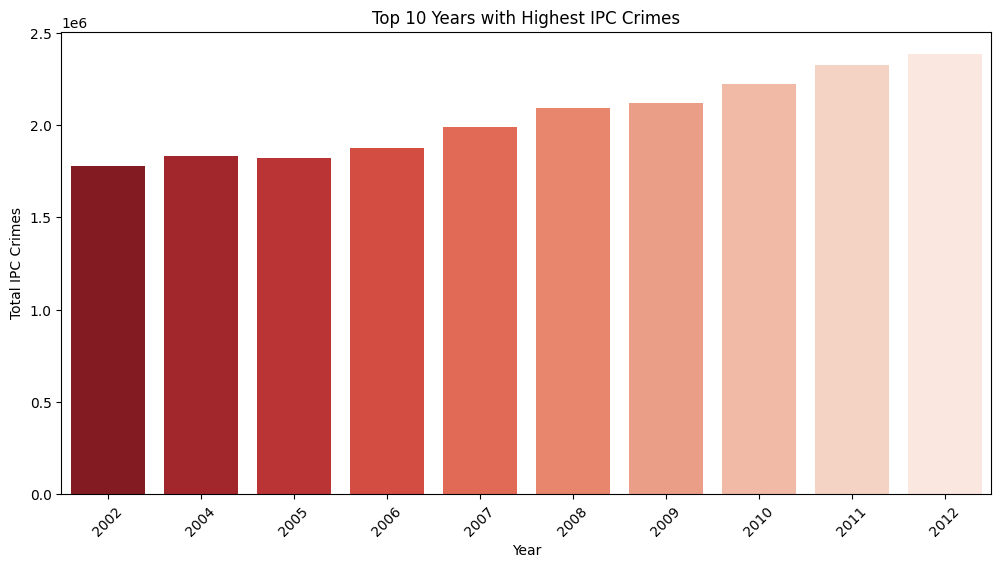

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_crime_year, x="YEAR", y="TOTAL IPC CRIMES", palette="Reds_r")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.title("Top 10 Years with Highest IPC Crimes")
plt.xticks(rotation=45)
plt.show()


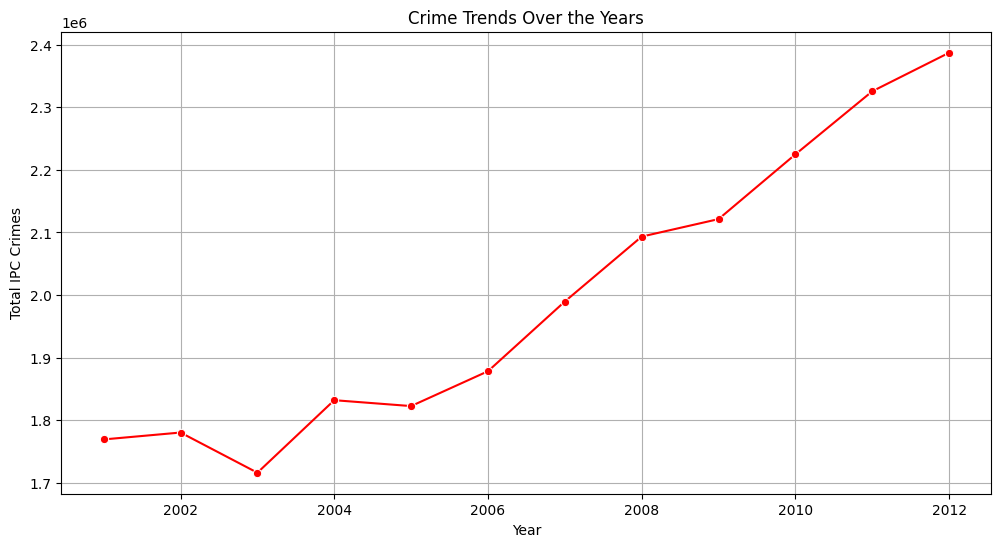

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby("YEAR")["TOTAL IPC CRIMES"].sum().reset_index(), x="YEAR", y="TOTAL IPC CRIMES", marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.title("Crime Trends Over the Years")
plt.grid(True)
plt.show()

In [17]:
print(df.columns)

Index(['STATE/UT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')


In [18]:
df.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,420.000000,420.000000,420.000000,420.00000,420.00000,420.000000,420.000000,420.000000,420.000000,420.000000,...,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2006.500000,958.435714,838.040476,106.22381,569.37381,0.061905,569.311905,849.659524,628.350000,221.309524,...,270.723810,8028.276190,217.147619,1078.940476,295.366667,2083.811905,2.123810,2385.390476,23340.069048,57001.557143
std,3.456169,1213.687365,1149.623253,253.86659,694.97765,0.392016,694.930776,1217.488114,966.279578,342.334028,...,357.828308,11603.262625,396.788651,1499.475571,698.715736,3236.534832,8.914278,3665.454858,29320.629427,66193.547043
min,2001.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,31.000000
25%,2003.750000,46.000000,32.000000,4.00000,29.00000,0.000000,29.000000,37.500000,15.500000,11.750000,...,18.000000,154.750000,1.000000,38.750000,2.000000,11.750000,0.000000,37.000000,693.750000,2408.500000
50%,2006.500000,463.500000,434.000000,29.00000,298.50000,0.000000,298.500000,295.500000,228.000000,81.500000,...,110.500000,1834.500000,45.000000,374.000000,28.000000,663.500000,0.000000,463.500000,10414.500000,30116.500000
75%,2009.250000,1461.000000,1302.250000,92.25000,936.00000,0.000000,935.250000,1195.500000,894.750000,287.000000,...,413.000000,11239.500000,273.500000,1662.000000,185.000000,2764.000000,0.000000,3025.000000,41774.750000,109178.500000
max,2012.000000,7601.000000,7964.000000,1616.00000,3425.00000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


In [21]:
from scipy.stats import f_oneway

years = df["YEAR"].unique()
crime_per_year = [df[df["YEAR"] == year]["TOTAL IPC CRIMES"] for year in years]

f_stat, p_value = f_oneway(*crime_per_year)
print("F-statistic:", f_stat)
print("P-value:", p_value)


F-statistic: 0.34154156053799717
P-value: 0.9758940602422012


In [ ]:
df.groupby("YEAR")['RAPE'].sum().reset_index().sort_values(by='RA')


,YEAR,RAPE
0,2001,16075
1,2002,16373
2,2003,15847
3,2004,18233
4,2005,18359
5,2006,19348
6,2007,20737
7,2008,21467
8,2009,21397
9,2010,22172
